In [1]:
import cv2
img=cv2.imread(r"D:\eye detection\imag2.jpg")
img

array([[[ 44,  28,   5],
        [ 44,  28,   5],
        [ 44,  28,   5],
        ...,
        [ 97,  41,  12],
        [ 97,  41,  12],
        [ 97,  41,  12]],

       [[ 44,  28,   5],
        [ 44,  28,   5],
        [ 44,  28,   5],
        ...,
        [ 97,  41,  12],
        [ 97,  41,  12],
        [ 97,  41,  12]],

       [[ 44,  28,   5],
        [ 44,  28,   5],
        [ 44,  28,   5],
        ...,
        [ 97,  41,  12],
        [ 97,  41,  12],
        [ 97,  41,  12]],

       ...,

       [[ 49,  28,   6],
        [ 49,  28,   6],
        [ 49,  28,   6],
        ...,
        [198,  67,  27],
        [198,  67,  27],
        [198,  67,  27]],

       [[ 49,  28,   6],
        [ 49,  28,   6],
        [ 49,  28,   6],
        ...,
        [198,  67,  27],
        [198,  67,  27],
        [198,  67,  27]],

       [[ 49,  28,   6],
        [ 49,  28,   6],
        [ 49,  28,   6],
        ...,
        [198,  67,  27],
        [198,  67,  27],
        [198,  67,  27]]

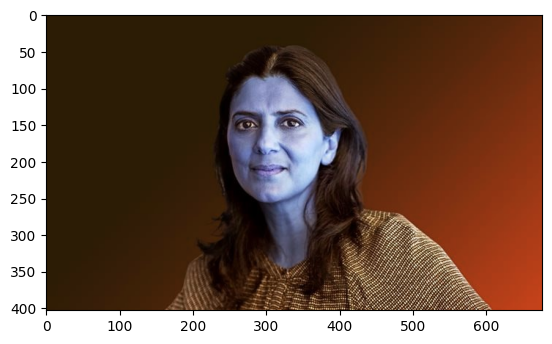

In [2]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [3]:
conv_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
conv_img

array([[[  5,  28,  44],
        [  5,  28,  44],
        [  5,  28,  44],
        ...,
        [ 12,  41,  97],
        [ 12,  41,  97],
        [ 12,  41,  97]],

       [[  5,  28,  44],
        [  5,  28,  44],
        [  5,  28,  44],
        ...,
        [ 12,  41,  97],
        [ 12,  41,  97],
        [ 12,  41,  97]],

       [[  5,  28,  44],
        [  5,  28,  44],
        [  5,  28,  44],
        ...,
        [ 12,  41,  97],
        [ 12,  41,  97],
        [ 12,  41,  97]],

       ...,

       [[  6,  28,  49],
        [  6,  28,  49],
        [  6,  28,  49],
        ...,
        [ 27,  67, 198],
        [ 27,  67, 198],
        [ 27,  67, 198]],

       [[  6,  28,  49],
        [  6,  28,  49],
        [  6,  28,  49],
        ...,
        [ 27,  67, 198],
        [ 27,  67, 198],
        [ 27,  67, 198]],

       [[  6,  28,  49],
        [  6,  28,  49],
        [  6,  28,  49],
        ...,
        [ 27,  67, 198],
        [ 27,  67, 198],
        [ 27,  67, 198]]

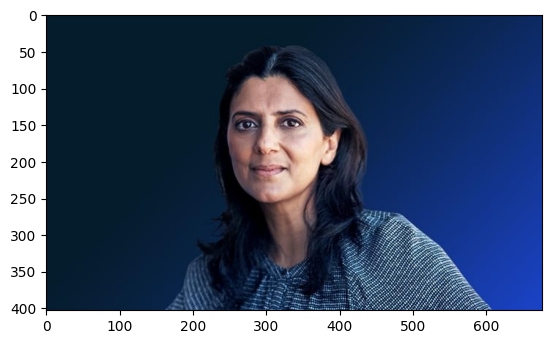

In [4]:
plt.imshow(conv_img)

In [5]:
img_gray=cv2.cvtColor(conv_img,cv2.COLOR_RGB2GRAY)
img_gray

array([[23, 23, 23, ..., 39, 39, 39],
       [23, 23, 23, ..., 39, 39, 39],
       [23, 23, 23, ..., 39, 39, 39],
       ...,
       [24, 24, 24, ..., 70, 70, 70],
       [24, 24, 24, ..., 70, 70, 70],
       [24, 24, 24, ..., 70, 70, 70]], dtype=uint8)

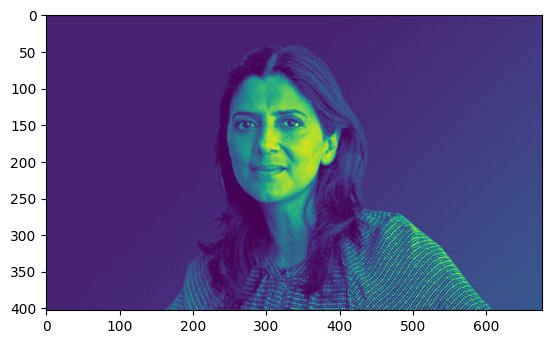

In [6]:
plt.imshow(img_gray)

In [7]:
eye_cascade=cv2.CascadeClassifier(r'D:\eye detection\haarcascade_eye.xml')
eye_cascade

< cv2.CascadeClassifier 000002299F8D3430>

In [8]:
eye=eye_cascade.detectMultiScale(img_gray,minNeighbors=6)
eye

array([[309, 128,  41,  41],
       [251, 130,  40,  40]])

In [9]:
for (x,y,w,h) in eye:
    cv2.rectangle(conv_img,(x,y),(x+w,y+h),(0,255,0),4)

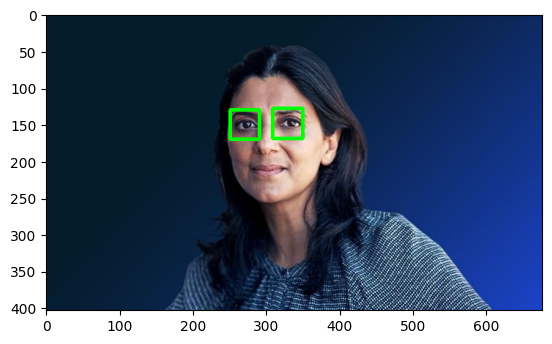

In [10]:
plt.imshow(conv_img)

In [ ]:
video=cv2.VideoCapture(r'D:\eye detection\WhatsApp Video 2024-03-13 at 11.36.56 AM.mp4')
while True:
    success,frame=video.read()
    if not success:
        break
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eye=eye_cascade.detectMultiScale(gray,minNeighbors=20)
    print(eye)
    for (x,y,w,h) in eye:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),4)
    cv2.imshow('Video',frame)
    if cv2.waitKey(1)&0XFF==ord('q'):
        break
    
video.release()
cv2.destroyAllWindows()

In [ ]:
video=cv2.VideoCapture(0)
while True:
    success,frame=video.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eye=eye_cascade.detectMultiScale(gray,minNeighbors=10)
    print(eye)
    for (x,y,w,h) in eye:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),4)
    cv2.imshow('video',frame)
    if cv2.waitKey(1)&0XFF==ord('q'):
        break

video.release()
cv2.destroyAllWindows()
